# Import dependencies

In [1]:
#import all 
%matplotlib inline
import matplotlib
import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import collections
import scipy

# Read in dataframes

This is necessary for computing percentages. If these are already computed and saved, move down to 'load computed datasets'.

In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/Scar_analysis/20190719_VAN3481_outputScarsPipelineCluster/'

First we have to import all count tables separately, then we will merge them into one dataframe df.

In [19]:
# Control sample for FACS3, day -2, non-induced
FACS3_daym2 = read_csv(pathToData + 'FACS3-bulk-daym2-c5-NI_000000000-CGLPL_S6/countTable/FACS3-bulk-daym2-c5-NI_000000000-CGLPL_S6_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS3_daym2 = FACS3_daym2.loc[[idx for idx in FACS3_daym2.index if 'Unknown'!=idx]]
FACS3_daym2 = FACS3_daym2.iloc[1:]
FACS3_daym2.columns = FACS3_daym2.columns.str.replace('FACS3-bulk-daym2-c5-NI_000000000-CGLPL_S6_','FACS3_daym2_NI.')
FACS3_daym2.index.names = ['chrom','allele','site', 'scar']
       
FACS3_daym2.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS3_daym2.columns] )
FACS3_daym2 = FACS3_daym2[sorted(FACS3_daym2.columns)]

In [20]:
# Control sample for FACS4, day -2, non-induced
FACS4_daym2 = read_csv(pathToData + 'FACS4-bulk-daym2-c5-NI_000000000-CGLPL_S1/countTable/FACS4-bulk-daym2-c5-NI_000000000-CGLPL_S1_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS4_daym2 = FACS4_daym2.loc[[idx for idx in FACS4_daym2.index if 'Unknown'!=idx]]
FACS4_daym2 = FACS4_daym2.iloc[1:]
FACS4_daym2.columns = FACS4_daym2.columns.str.replace('FACS4-bulk-daym2-c5-NI_000000000-CGLPL_S1_','FACS4_daym2_NI.')
FACS4_daym2.index.names = ['chrom','allele','site', 'scar']
       
FACS4_daym2.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS4_daym2.columns] )
FACS4_daym2 = FACS4_daym2[sorted(FACS4_daym2.columns)]

In [21]:
# Control sample for FACS4, day 0, induced
FACS4_day0 = read_csv(pathToData + 'FACS4-bulk-day0-c5-Ind_000000000-CGLPL_S2/countTable/FACS4-bulk-day0-c5-Ind_000000000-CGLPL_S2_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS4_day0 = FACS4_day0.loc[[idx for idx in FACS4_day0.index if 'Unknown'!=idx]]
FACS4_day0 = FACS4_day0.iloc[1:]
FACS4_day0.columns = FACS4_day0.columns.str.replace('FACS4-bulk-day0-c5-Ind_000000000-CGLPL_S2_','FACS4_day0_Ind.')
FACS4_day0.index.names = ['chrom','allele','site', 'scar']
       
FACS4_day0.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS4_day0.columns] )
FACS4_day0 = FACS4_day0[sorted(FACS4_day0.columns)]

In [22]:
# Control sample for FACS4, day 5, induced
FACS4_day5 = read_csv(pathToData + 'FACS4-bulk-day5-c5-Ind_000000000-CGLPL_S3/countTable/FACS4-bulk-day5-c5-Ind_000000000-CGLPL_S3_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS4_day5 = FACS4_day5.loc[[idx for idx in FACS4_day5.index if 'Unknown'!=idx]]
FACS4_day5 = FACS4_day5.iloc[1:]
FACS4_day5.columns = FACS4_day5.columns.str.replace('FACS4-bulk-day5-c5-Ind_000000000-CGLPL_S3_','FACS4_day5_Ind.')
FACS4_day5.index.names = ['chrom','allele','site', 'scar']
       
FACS4_day5.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS4_day5.columns] )
FACS4_day5 = FACS4_day5[sorted(FACS4_day5.columns)]

In [23]:
# Control sample for FACS4, day 7, induced
FACS4_day7i = read_csv(pathToData + 'FACS4-bulk-day7-c5-Ind_000000000-CGLPL_S4/countTable/FACS4-bulk-day7-c5-Ind_000000000-CGLPL_S4_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS4_day7i = FACS4_day7i.loc[[idx for idx in FACS4_day7i.index if 'Unknown'!=idx]]
FACS4_day7i = FACS4_day7i.iloc[1:]
FACS4_day7i.columns = FACS4_day7i.columns.str.replace('FACS4-bulk-day7-c5-Ind_000000000-CGLPL_S4_','FACS4_day7_Ind.')
FACS4_day7i.index.names = ['chrom','allele','site', 'scar']
       
FACS4_day7i.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS4_day7i.columns] )
FACS4_day7i = FACS4_day7i[sorted(FACS4_day7i.columns)]

In [24]:
# Control sample for FACS4, day 7, non-induced
FACS4_day7NI = read_csv(pathToData + 'FACS4-bulk-day7-c5-NI_000000000-CGLPL_S5/countTable/FACS4-bulk-day7-c5-NI_000000000-CGLPL_S5_SQfiltered_countTable_nodedup.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
FACS4_day7NI = FACS4_day7NI.loc[[idx for idx in FACS4_day7NI.index if 'Unknown'!=idx]]
FACS4_day7NI = FACS4_day7NI.iloc[1:]
FACS4_day7NI.columns = FACS4_day7NI.columns.str.replace('FACS4-bulk-day7-c5-NI_000000000-CGLPL_S5_','FACS4_day7_NI.')
FACS4_day7NI.index.names = ['chrom','allele','site', 'scar']
       
FACS4_day7NI.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in FACS4_day7NI.columns] )
FACS4_day7NI = FACS4_day7NI[sorted(FACS4_day7NI.columns)]

In [31]:
FACS3_daym2.head()

FACS3_daym2_NI  \
                                                                                            1   
chrom allele      site      scar                                                                
12    129S1_SvImJ 114682729 114682733.D                                                   NaN   
                            114682733.D,114682734.D                                       NaN   
                            114682734.D                                                   NaN   
                            114682736.D                                                   NaN   
                            114682736.D,114682737.D,114682738.D,114682739.D...            NaN   

                                                                                    \
                                                                                16   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682734.D                                        NaN   
                            114682736.D                                        NaN   
                            114682736.D,114682737.D,114682738.D,114682739.D... NaN   

                                                                                    \
                                                                                 2   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682734.D                                        NaN   
                            114682736.D                                        NaN   
                            114682736.D,114682737.D,114682738.D,114682739.D... NaN   

                                                                                    \
                                                                                 4   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682734.D                                        NaN   
                            114682736.D                                        NaN   
                            114682736.D,114682737.D,114682738.D,114682739.D... NaN   

                                                                                      \
                                                                                   6   
chrom allele      site      scar                                                       
12    129S1_SvImJ 114682729 114682733.D                                         75.0   
                            114682733.D,114682734.D                              5.0   
                            114682734.D                                         13.0   
                            114682736.D                                          3.0   
                            114682736.D,114682737.D,114682738.D,114682739.D...   1.0   

                                                                                    
                                                                                 8  
chrom allele      site      scar                                                    
12    129S1_SvImJ 114682729 114682733.D                                        NaN  
                            114682733.D,114682734.D                            NaN  
                            114682734.D                                        NaN  
                    

# Check quality of the data, barcode bleed through etc.

First we will check the barcode bleedthrough. Every bulk sample has gotten 1 index, and samples are tagged as follows:


| Sample  | Index  |
|---|---|
|  FACS4, day -2, non-induced | Index 1 |
|  FACS4, day 0, induced | Index 2 |
|  FACS4, day 5, induced | Index 3 |
|  FACS4, day 7, induced | Index 4 |
|  FACS4, day 7, non-induced | Index 5 |
|  FACS3, day -2, non-induced | Index 6 |



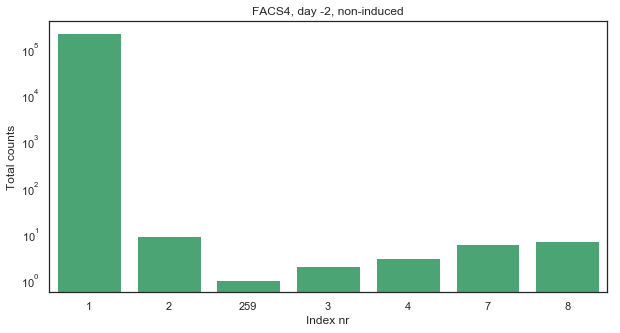

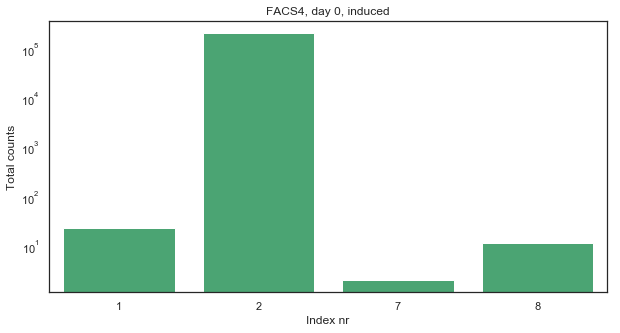

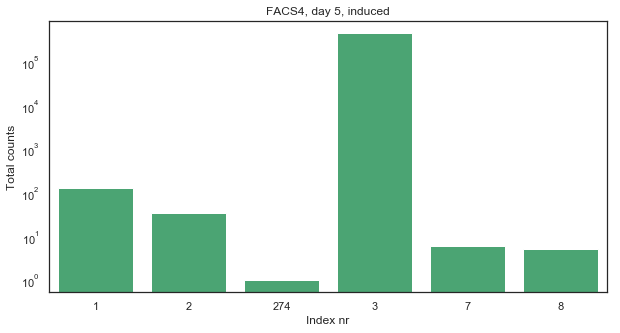

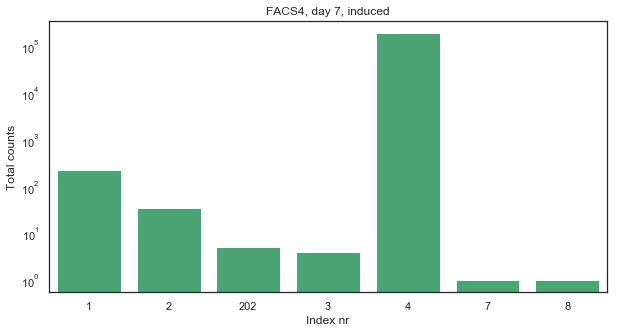

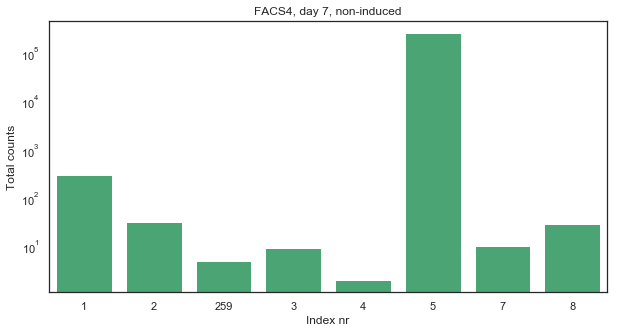

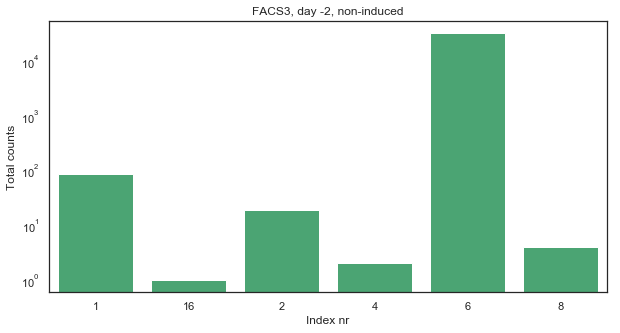

In [32]:
sums_cells_all_FACS4_daym2 = FACS4_daym2.sum(axis=0)
sums_cells_all_FACS4_day0 = FACS4_day0.sum(axis=0)
sums_cells_all_FACS4_day5 = FACS4_day5.sum(axis=0)
sums_cells_all_FACS4_day7i = FACS4_day7i.sum(axis=0)
sums_cells_all_FACS4_day7NI = FACS4_day7NI.sum(axis=0)
sums_cells_all_FACS3_daym2 = FACS3_daym2.sum(axis=0)


#all counts per index for every sample
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS4_daym2.index.levels[1], y=sums_cells_all_FACS4_daym2, log='y', color='mediumseagreen')
ax.set_title('FACS4, day -2, non-induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS4_day0.index.levels[1], y=sums_cells_all_FACS4_day0, log='y', color='mediumseagreen')
ax.set_title('FACS4, day 0, induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS4_day5.index.levels[1], y=sums_cells_all_FACS4_day5, log='y', color='mediumseagreen')
ax.set_title('FACS4, day 5, induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS4_day7i.index.levels[1], y=sums_cells_all_FACS4_day7i, log='y', color='mediumseagreen')
ax.set_title('FACS4, day 7, induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS4_day7NI.index.levels[1], y=sums_cells_all_FACS4_day7NI, log='y', color='mediumseagreen')
ax.set_title('FACS4, day 7, non-induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_FACS3_daym2.index.levels[1], y=sums_cells_all_FACS3_daym2, log='y', color='mediumseagreen')
ax.set_title('FACS3, day -2, non-induced')
ax.set(xlabel='Index nr', ylabel='Total counts')
plt.show()

In [60]:
# check percentage of reads with correct scar barcode
print ('FACS4, day -2, non-induced: ' + str(sums_cells_all_FACS4_daym2[0]/sums_cells_all_FACS4_daym2.sum()*100) + ' %')
print ('FACS4, day 0, induced: ' + str(sums_cells_all_FACS4_day0[1] / sums_cells_all_FACS4_day0.sum()*100) + ' %')
print ('FACS4, day 5, induced: ' + str(sums_cells_all_FACS4_day5[3] / sums_cells_all_FACS4_day5.sum()*100) + ' %')
print ('FACS4, day 7, induced: ' + str(sums_cells_all_FACS4_day7i[4] / sums_cells_all_FACS4_day7i.sum()*100) + ' %')
print ('FACS4, day 7, non-induced: ' + str(sums_cells_all_FACS4_day7NI[5] / sums_cells_all_FACS4_day7NI.sum()*100) + ' %')
print ('FACS3, day -2, non-induced: ' + str(sums_cells_all_FACS3_daym2[4] / sums_cells_all_FACS3_daym2.sum()*100) + ' %')

FACS4, day -2, non-induced: 99.98695082792337 %
FACS4, day 0, induced: 99.98261935913715 %
FACS4, day 5, induced: 99.96278385378572 %
FACS4, day 7, induced: 99.86062606981415 %
FACS4, day 7, non-induced: 99.84905748686566 %
FACS3, day -2, non-induced: 99.6508226115952 %


Now we can merge all samples together into one dataframe 'df', dropping per sample all reads with the incorrect scar barcode.

In [72]:
dfs_all = [FACS4_daym2,FACS4_day0,FACS4_day5,FACS4_day7i,FACS4_day7NI,FACS3_daym2]
data_all = dfs_all[0].join(dfs_all[1:],how='outer')

df = data_all[[('FACS4_daym2_NI', '1'),('FACS4_day0_Ind','2'), ('FACS4_day5_Ind','3'),
                ('FACS4_day7_Ind','4'), ('FACS4_day7_NI','5'), ('FACS3_daym2_NI','6')]]

df.columns = df.columns.droplevel(level=1)

In [73]:
data_all.head()

FACS4_daym2_NI  \
                                                                                            1   
chrom allele      site      scar                                                                
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                       NaN   
                            114682733.D                                                 797.0   
                            114682733.D,114682734.D                                      39.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...            NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D...            NaN   

                                                                                    \
                                                                                 2   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682732.D,114682733.D                            NaN   
                            114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682733.D,114682734.D,114682777.D,114682778.D... NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D... NaN   

                                                                                    \
                                                                               259   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682732.D,114682733.D                            NaN   
                            114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682733.D,114682734.D,114682777.D,114682778.D... NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D... NaN   

                                                                                    \
                                                                                 3   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682732.D,114682733.D                            NaN   
                            114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682733.D,114682734.D,114682777.D,114682778.D... NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D... NaN   

                                                                                    \
                                                                                 4   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682732.D,114682733.D                            NaN   
                            114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            114682733.D,114682734.D,114682777.D,114682778.D... NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D... NaN   

                                                                                    \
                                                                                 7   
chrom allele      site      scar                                                     
12    129S1_SvImJ 114682729 114682732.D,114682733.D                            NaN   
                            114682733.D                                        NaN   
                            114682733.D,114682734.D                            NaN   
                            11

In [74]:
df.head()

FACS4_daym2_NI  \
chrom allele      site      scar                                                                 
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                        NaN   
                            114682733.D                                                  797.0   
                            114682733.D,114682734.D                                       39.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...             NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D...             NaN   

                                                                                FACS4_day0_Ind  \
chrom allele      site      scar                                                                 
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                        NaN   
                            114682733.D                                                  391.0   
                            114682733.D,114682734.D                                        7.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...             NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D...             NaN   

                                                                                FACS4_day5_Ind  \
chrom allele      site      scar                                                                 
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                        2.0   
                            114682733.D                                                 1000.0   
                            114682733.D,114682734.D                                       31.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...             1.0   
                            114682733.D,114682734.D,114682778.D,114682779.D...             NaN   

                                                                                FACS4_day7_Ind  \
chrom allele      site      scar                                                                 
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                        NaN   
                            114682733.D                                                  274.0   
                            114682733.D,114682734.D                                        6.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...             NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D...             1.0   

                                                                                FACS4_day7_NI  \
chrom allele      site      scar                                                                
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                       NaN   
                            114682733.D                                                 672.0   
                            114682733.D,114682734.D                                      28.0   
                            114682733.D,114682734.D,114682777.D,114682778.D...            NaN   
                            114682733.D,114682734.D,114682778.D,114682779.D...            NaN   

                                                                                FACS3_daym2_NI  
chrom allele      site      scar                                                                
12    129S1_SvImJ 114682729 114682732.D,114682733.D                                        NaN  
                            114682733.D                                                   75.0  
                            114682733.D,114682734.D                                        5.0  
                            114682733.D,114682734.D,114682777.D,114682778.D...             NaN  
                            114682733.D,114682734.D,114682778.D,114682

Now that we have selected the reads with the correct scar barcode, we can plot the total counts of the final dataframe

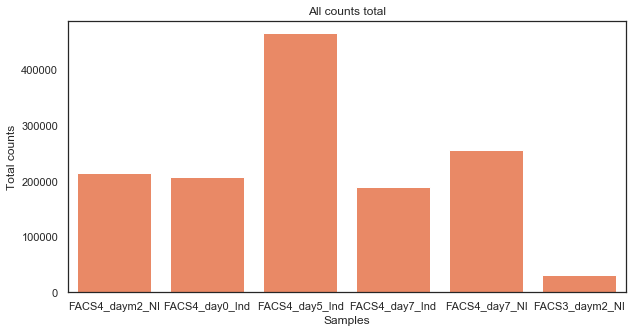

In [75]:
#selected
sums_cells_df = df.sum(axis=0)

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_df.index, y=sums_cells_df,color='coral')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

In [76]:
sf = df.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

# Check counts per allele and gRNA target site

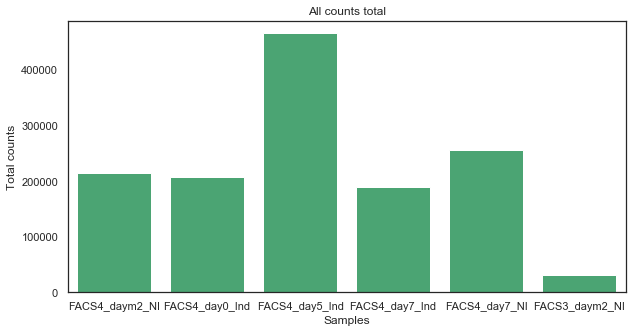

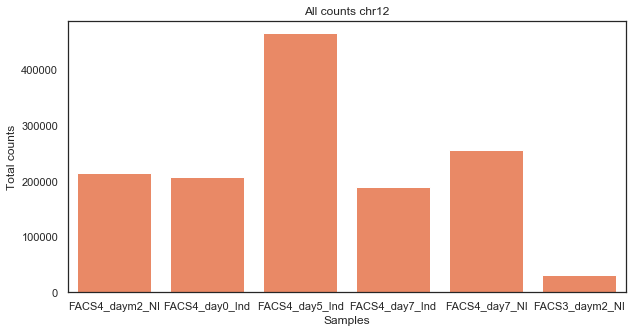

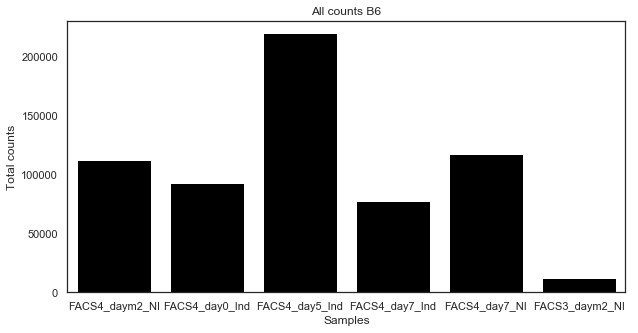

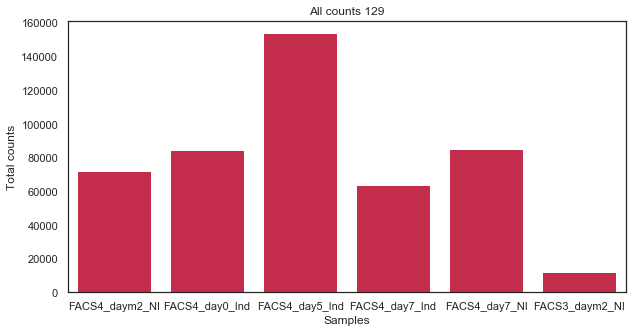

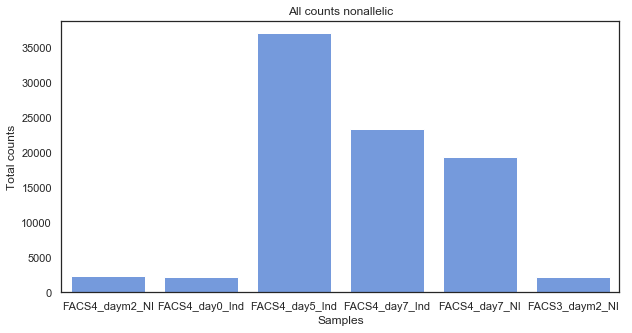

In [78]:
sums_cells_all = df.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)
sums_cells_NA = sf_nonallelic.sum(axis=0)


#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_NA.index, y=sums_cells_NA, color='cornflowerblue')
ax.set_title('All counts nonallelic')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

/Users/m.blotenburg/miniconda2/envs/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/m.blotenburg/miniconda2/envs/conda/lib/python3.6/site-packages/ipykernel_launcher.py:54: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


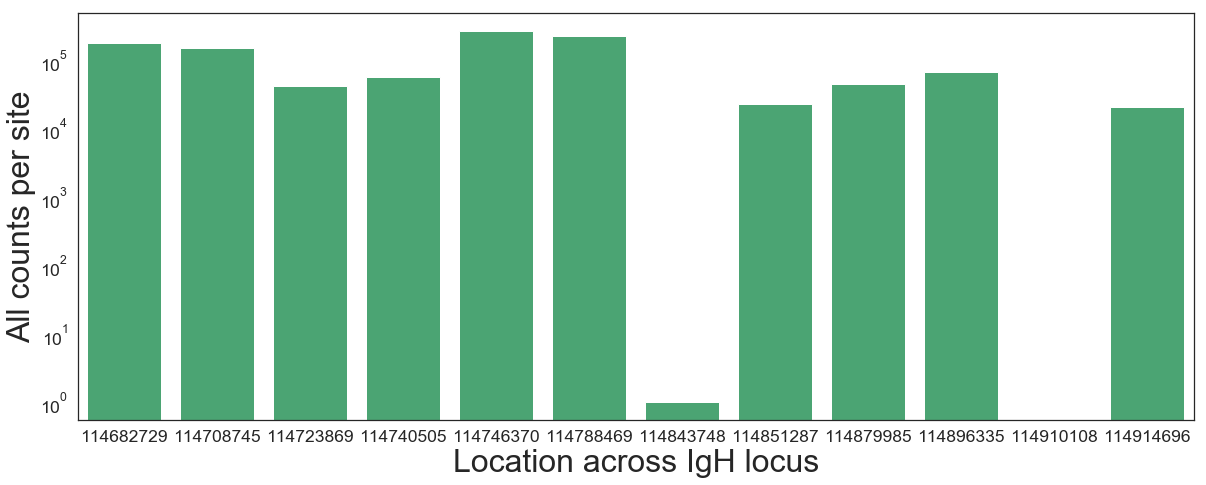

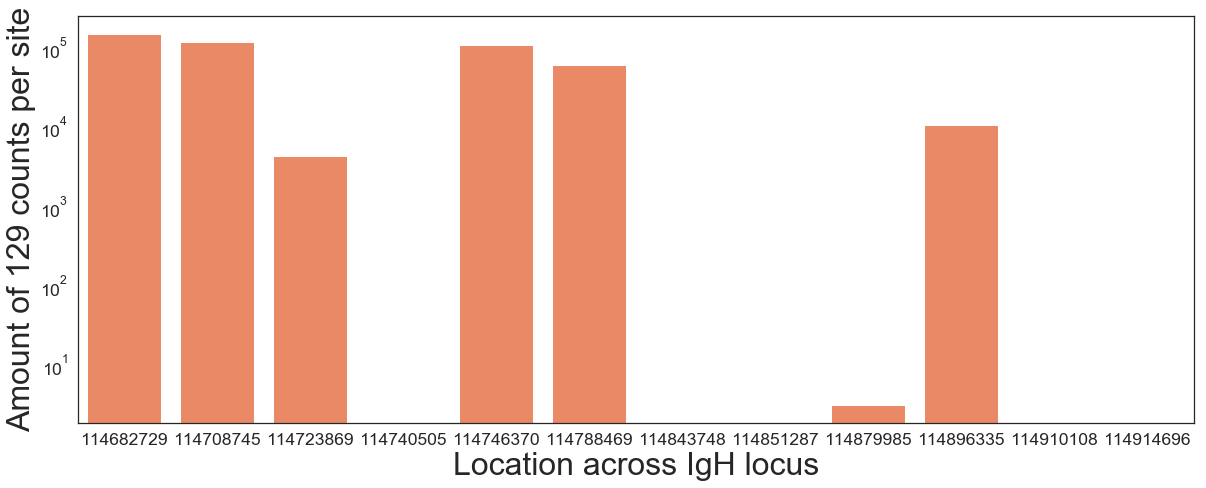

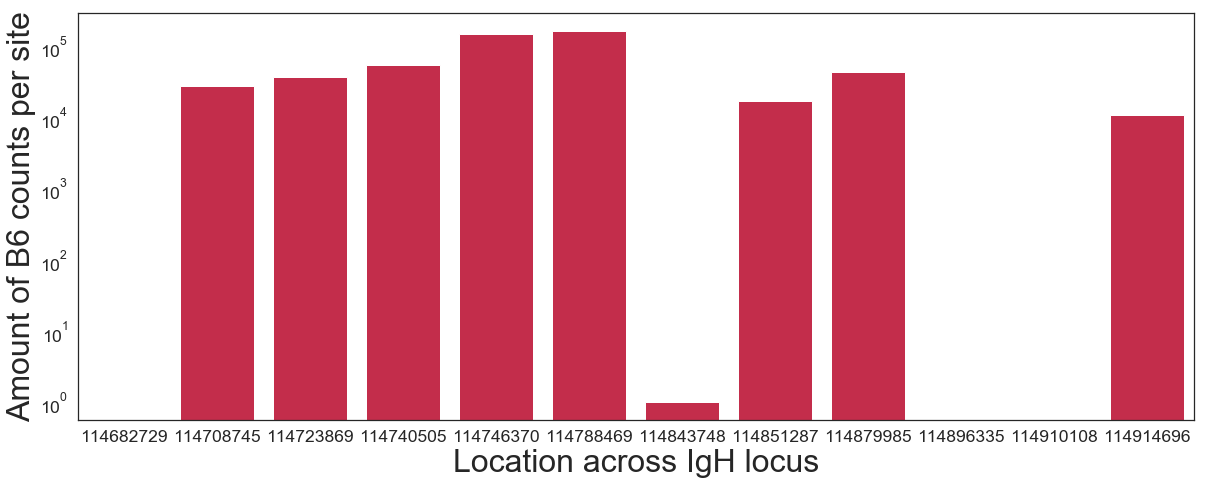

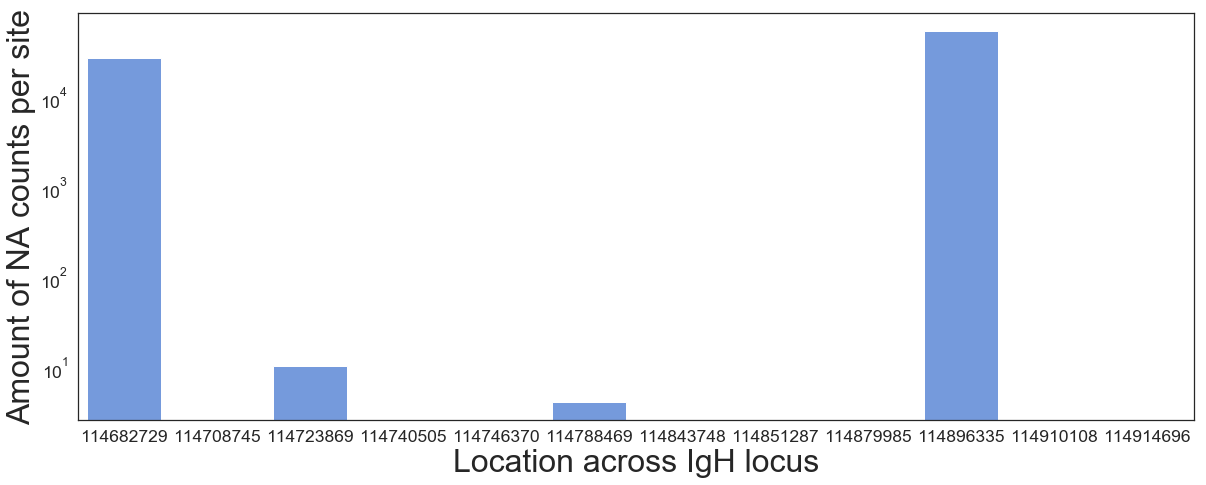

In [79]:
#dropping levels chr12 allele specific
index129 = sf_129.index.droplevel(1)
totalcountspersite_129 = sf_129.copy()
totalcountspersite_129.index = index129
sums_cells_129 = totalcountspersite_129.sum(axis=1)
sums_cells_129_merged = sums_cells_129.groupby('site').sum()

indexB6 = sf_B6.index.droplevel(1)
totalcountspersite_B6 = sf_B6.copy()
totalcountspersite_B6.index = indexB6
sums_cells_B6 = totalcountspersite_B6.sum(axis=1)
sums_cells_B6_merged = sums_cells_B6.groupby('site').sum()

indexNA = sf_nonallelic.index.droplevel(1)
totalcountspersite_NA = sf_nonallelic.copy()
totalcountspersite_NA.index = indexNA
sums_cells_NA = totalcountspersite_NA.sum(axis=1)
sums_cells_NA_merged = sums_cells_NA.groupby('site').sum()

sums_cells_B6_merged = sums_cells_B6_merged[sorted(sums_cells_B6_merged.index)]
sums_cells_B6_merged_pd = pd.DataFrame(sums_cells_B6_merged)
sums_cells_129_merged = sums_cells_129_merged[sorted(sums_cells_129_merged.index)]
sums_cells_129_merged_pd = pd.DataFrame(sums_cells_129_merged)
sums_cells_NA_merged = sums_cells_NA_merged[sorted(sums_cells_NA_merged.index)]
sums_cells_NA_merged_pd = pd.DataFrame(sums_cells_NA_merged)

#B6_129_countspersite = sums_cells_B6_merged_pd.merge(sums_cells_129_merged_pd, on='site')
B6_129_countspersite = pd.concat([sums_cells_B6_merged_pd,sums_cells_129_merged_pd, sums_cells_NA_merged_pd], axis=1, sort=True)
B6_129_countspersite.columns = ['B6', '129', 'NA']
B6_129_countspersite = B6_129_countspersite.fillna(0)

selectedrawcounts = B6_129_countspersite.loc[['114682729','114708745','114723869','114740505','114746370','114788469',
                                              '114843748', '114851287','114879985','114896335','114910108','114914696']]

#### All counts for scarred sites
indexAllSites12 = sf.index.droplevel(0)
allSites12 = sf.copy()
allSites12.index = indexAllSites12

indexAllSitesChr12 = allSites12.index.droplevel(1)
allSitesChr12 = allSites12.copy()
allSitesChr12.index = indexAllSitesChr12
allSitesChr12

sums_cells_all = allSitesChr12.sum(axis=1)
sums_cells_all
sums_cells_all_merged = sums_cells_all.groupby('site').sum()

sums_cells_all_merged = sums_cells_all_merged[sorted(sums_cells_all_merged.index)]
sums_cells_all_merged_pd = pd.DataFrame(sums_cells_all_merged)

selectedrawcountsforall = sums_cells_all_merged_pd.loc[['114682729','114708745','114723869','114740505','114746370',
                                                        '114788469', '114843748', '114851287','114879985', 
                                                        '114896335','114910108','114914696']]
selectedrawcountsforall.columns = ['All']

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', palette="winter")
ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', color='mediumseagreen')

plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('All counts per site', fontsize=32)
ax.tick_params(labelsize=17.5)
plt.show()

#### All counts per allele for scarred sites
sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', color='coral')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of 129 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', color='crimson')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of B6 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['NA'], log='y', color='cornflowerblue')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of NA counts per site', fontsize=32)
plt.show()

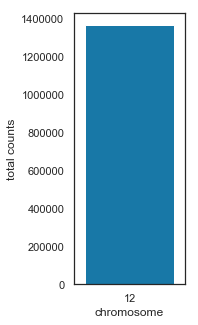

In [80]:
#Plot raw counts per chromosome
sums_cells = df.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)

sns.set(style="white")
plt.figure(figsize=(2,5))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

plt.show()

# Calculate percentages per allele for chromosome 12

#### This should only be necessary once. If this has been computed and saved already, move down to 'load computed datasets'.

here we also filter on the amount of reads per cell/site/allele by continuing when totalReadsForThisSite < 4.
To be considered for conversion to percentages, a cell/site/allele must contain 4 or more reads.

In [82]:
sitesB6 = []
sites129 = []
sitesNA = []
for (allele,site,scar) in sf.index:
    if allele == 'C57BL_6NJ':
        if site != 'None':
            if site not in sitesB6:
                sitesB6.append(site)
    if allele == '129S1_SvImJ':
        if site != 'None':
            if site not in sites129:
                sites129.append(site)
    if allele != 'C57BL_6NJ' and allele != '129S1_SvImJ' and allele !='129S1_SvImJ,C57BL_6NJ' :
        if site != 'None':
            if site not in sitesNA:
                sitesNA.append(site)

In [101]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_129.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 0.01:
                cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

percentagesChrom12 = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)

In [102]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_B6.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 0.01:
                cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage

percentagesChr12B6 = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)

In [103]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 0.01:
                cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)

In [ ]:
#to save dataframes
percentagesChr12_129.to_pickle(pathToData + 'VAN3481_FACScontrols_dataFramepercentagesChr12_129.pickle.gz')
percentagesChr12_B6.to_pickle(pathToData + 'VAN3481_FACScontrols_dataFramepercentagesChr12_B6.pickle.gz')
percentagesChr12_NA.to_pickle(pathToData + 'VAN3481_FACScontrols_dataFramepercentagesChr12_NA.pickle.gz')

# Plotting percentages

Plot percentages of scars per cell for one site and all cells of one gastruloid

### Allele 129

In [128]:
percentagesChr12_129.index.levels[0]

Int64Index([114682729, 114708745, 114723869, 114746370, 114781506, 114788469,
            114829361, 114835320, 114875401, 114896335, 114937210, 114946047],
           dtype='int64')

Site 114682729 - gRNA target site

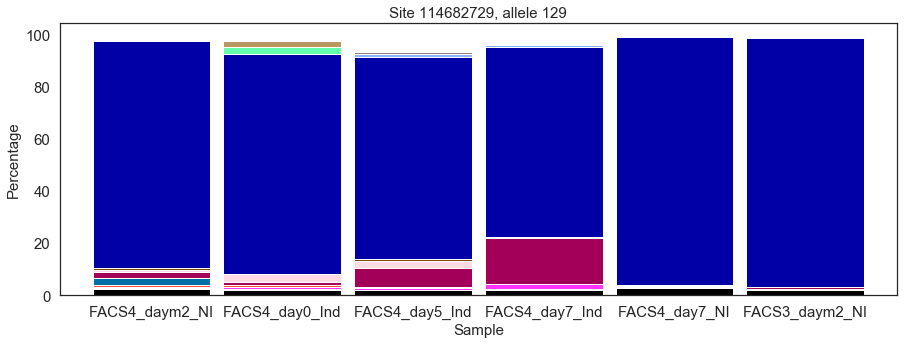

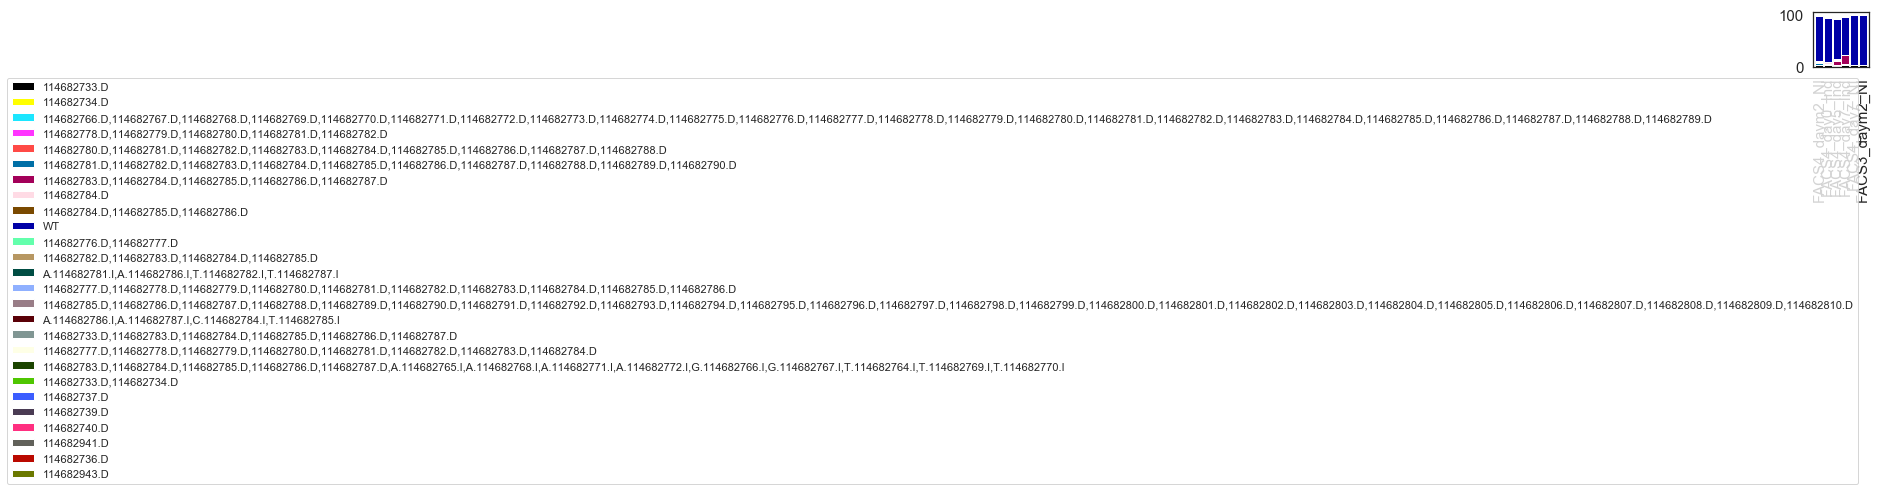

In [133]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114682729].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114682729, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))


Site 114708745 - gRNA target site

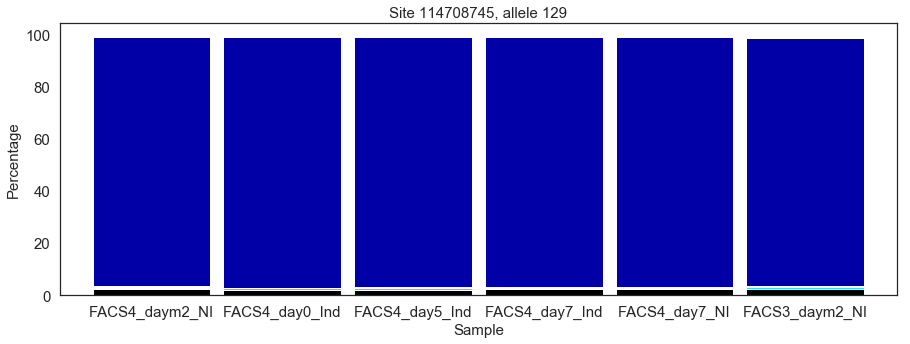

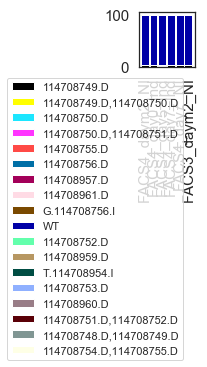

In [134]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114708745].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114708745, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114723869 - gRNA target site

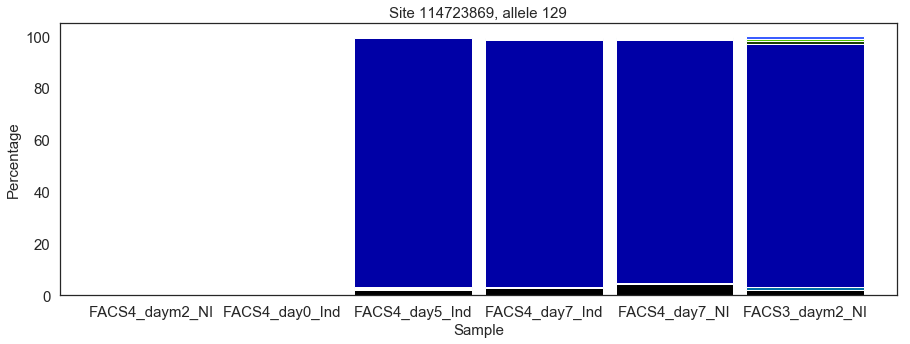

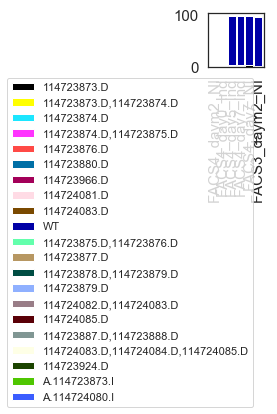

In [135]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114723869].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114723869, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114746370 - gRNA target site

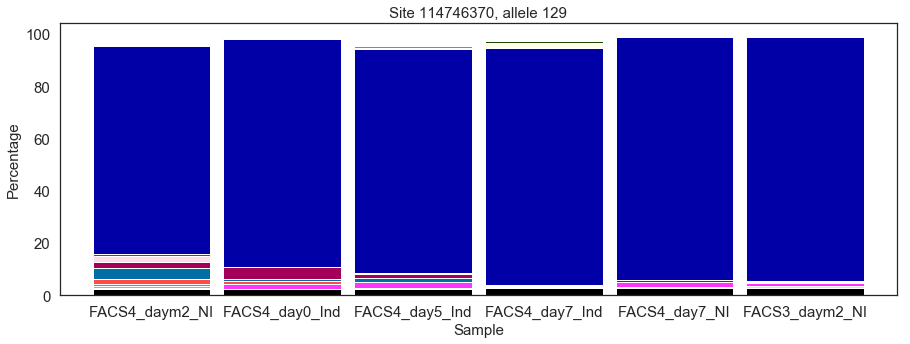

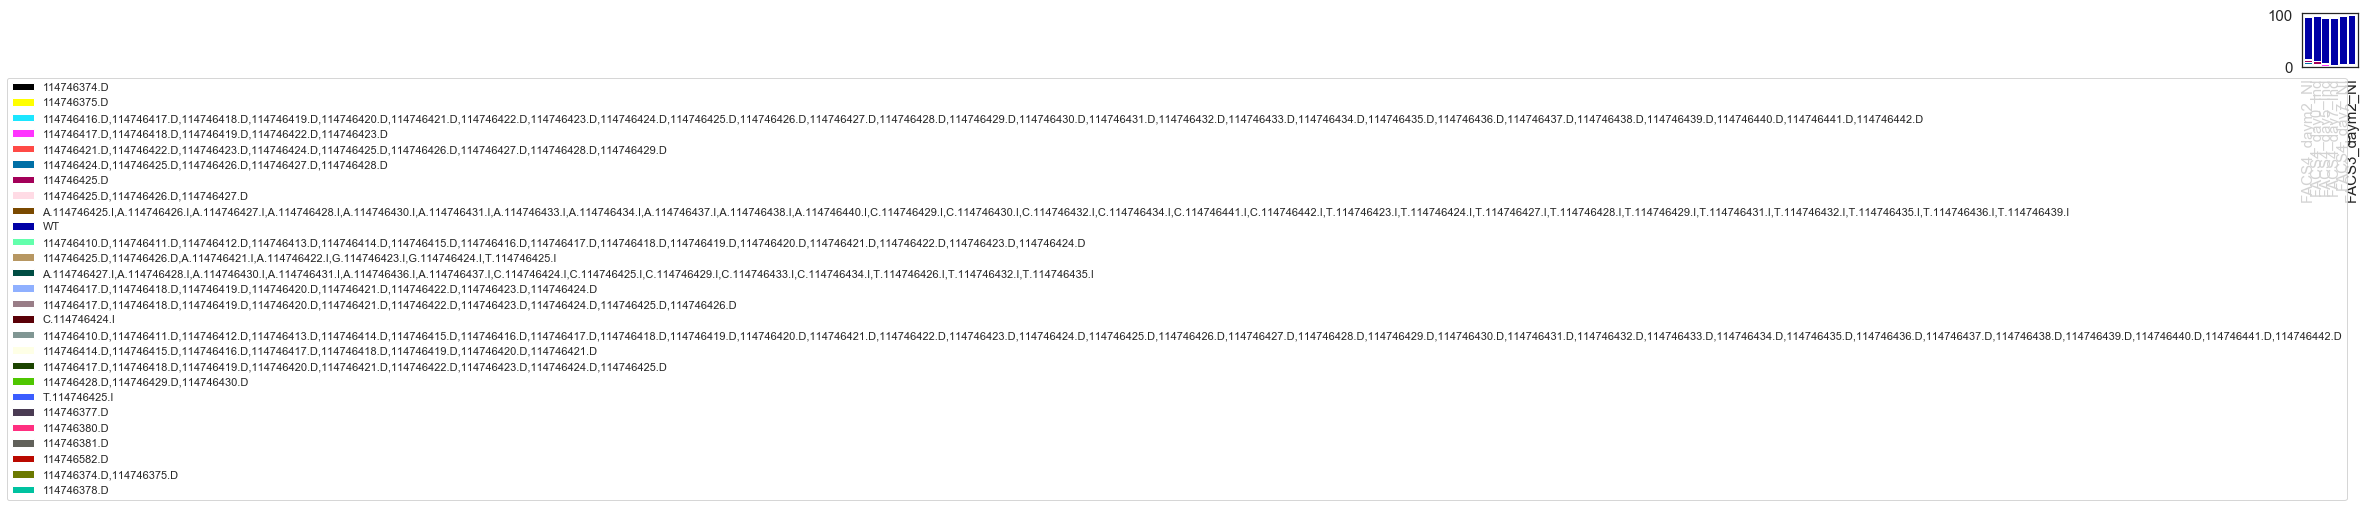

In [136]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114746370].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114781506 - no target site

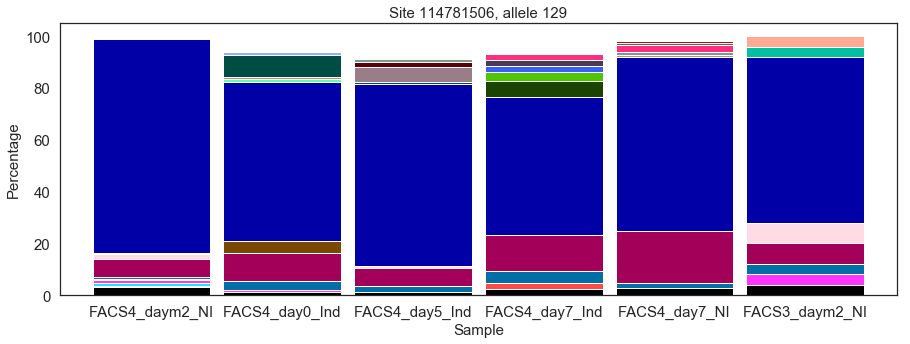

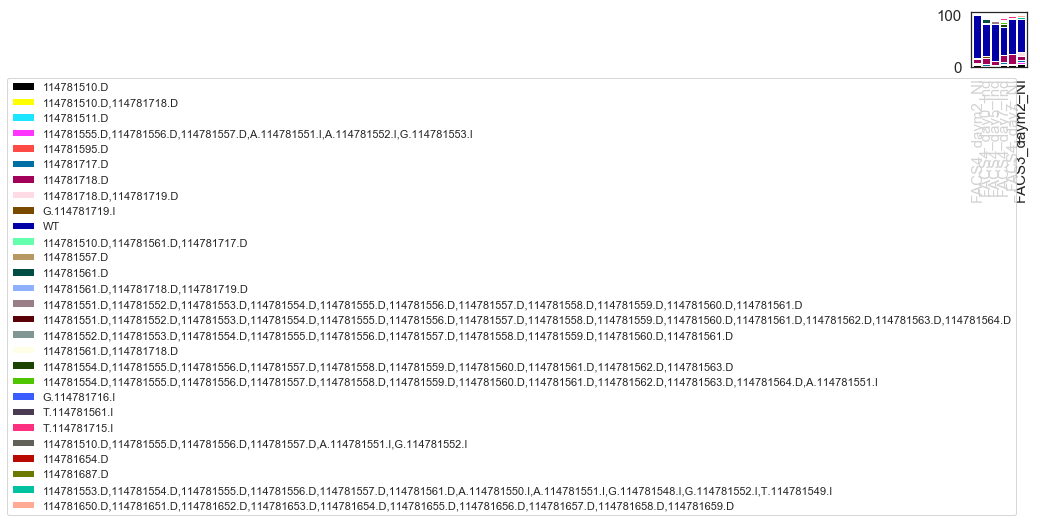

In [137]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114781506].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114781506, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114788469 - gRNA target site

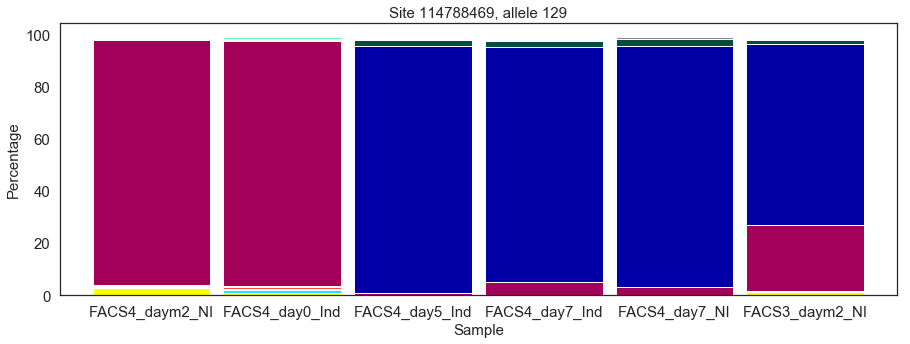

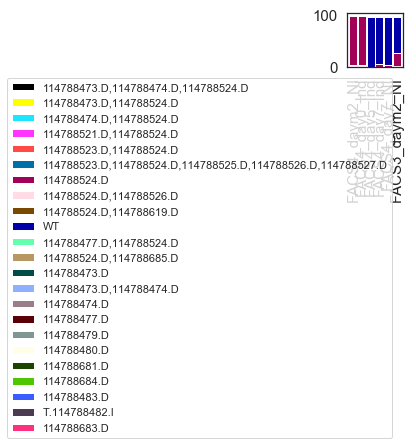

In [138]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114788469].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114788469, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114829361 - no target site

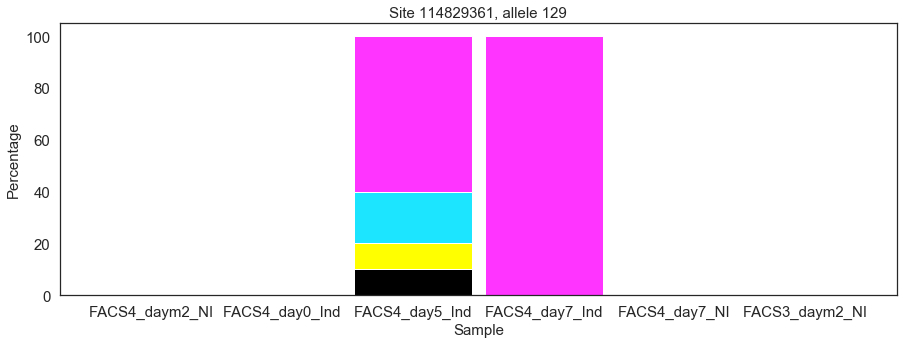

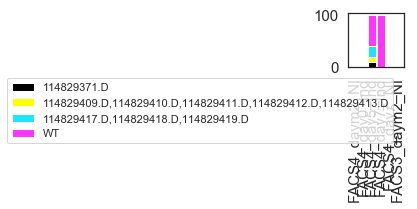

In [139]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114829361].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114829361, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114835320 - no target site

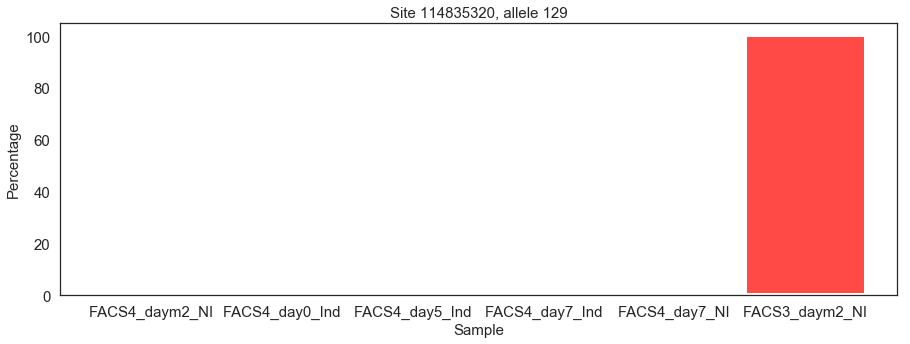

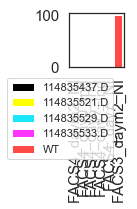

In [140]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114835320].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114835320, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114875401 - no target site

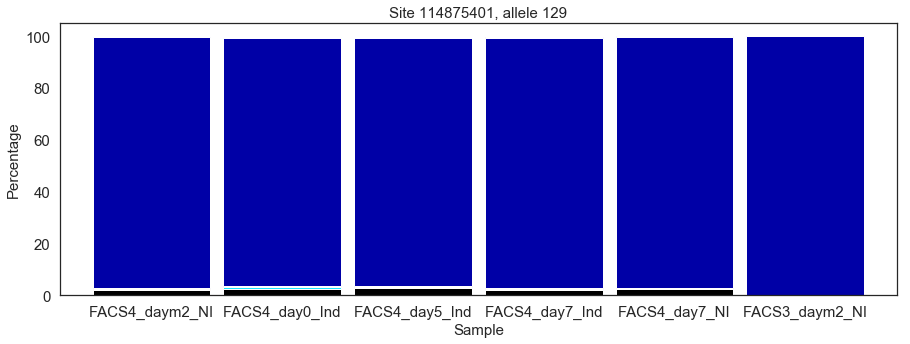

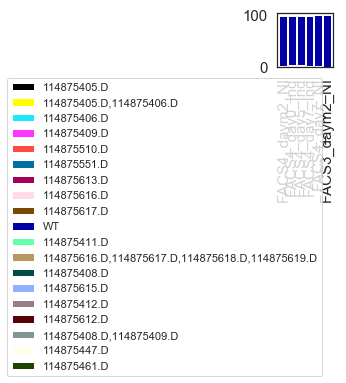

In [141]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114875401].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114875401, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114896335 - gRNA target site

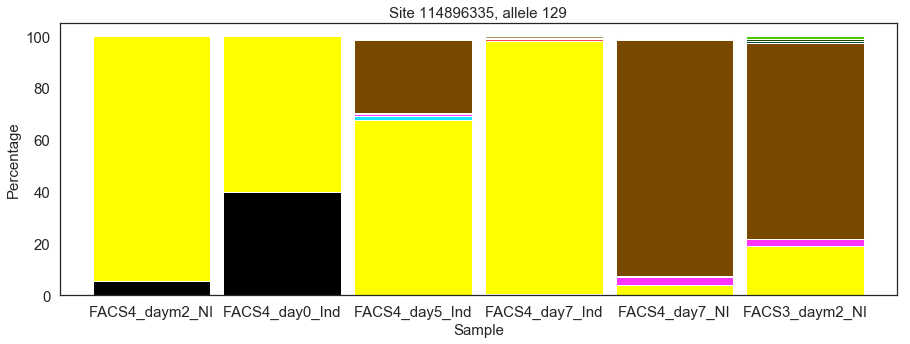

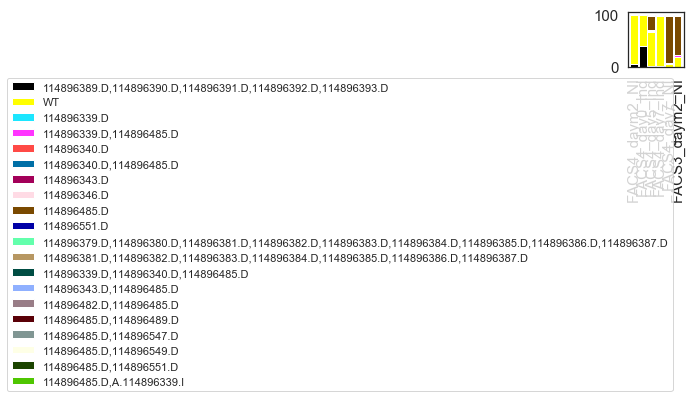

In [142]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114896335].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114896335, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114937210 - no target site

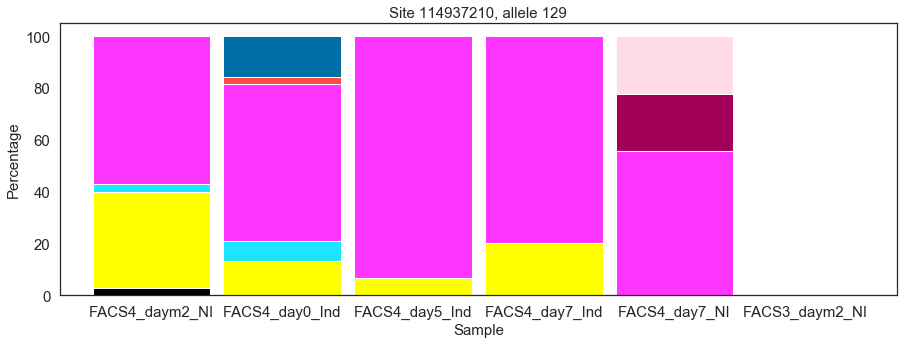

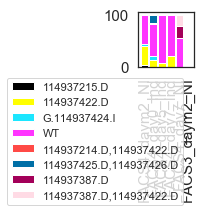

In [143]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114937210].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114937210, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114946047 - no target site

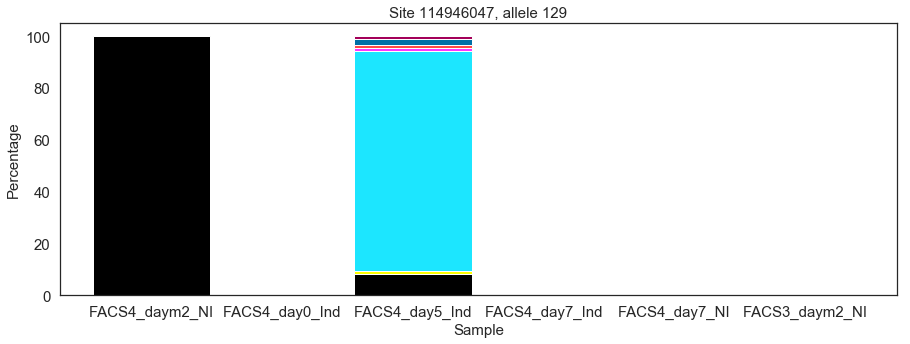

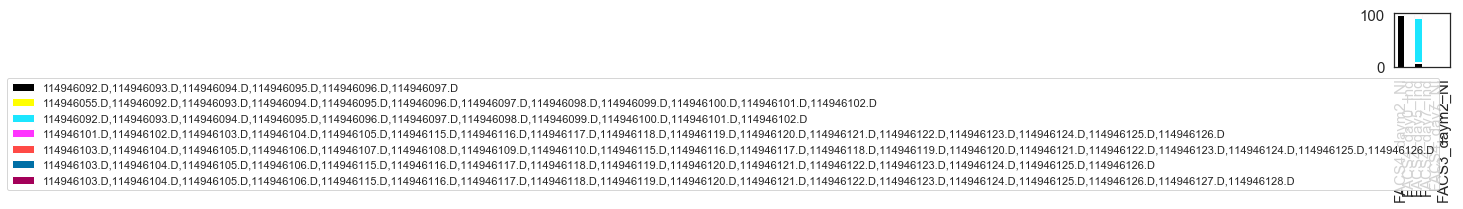

In [144]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114946047].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114946047, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

### Allele B6

In [130]:
percentagesChr12_B6.index.levels[0]

Int64Index([114708745, 114723869, 114736342, 114740505, 114746370, 114781506,
            114788469, 114851287, 114875401, 114879985, 114914696, 114946047],
           dtype='int64')

Site 114708745 - gRNA target site

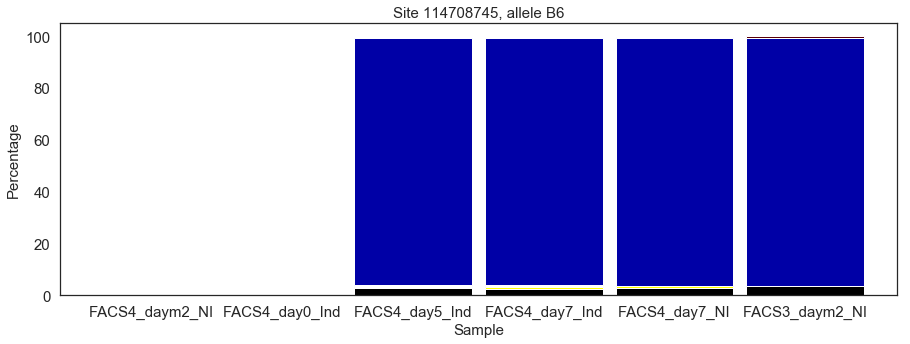

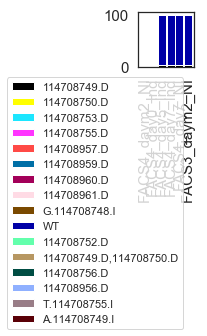

In [145]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114708745].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114708745, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114723869 - gRNA target site

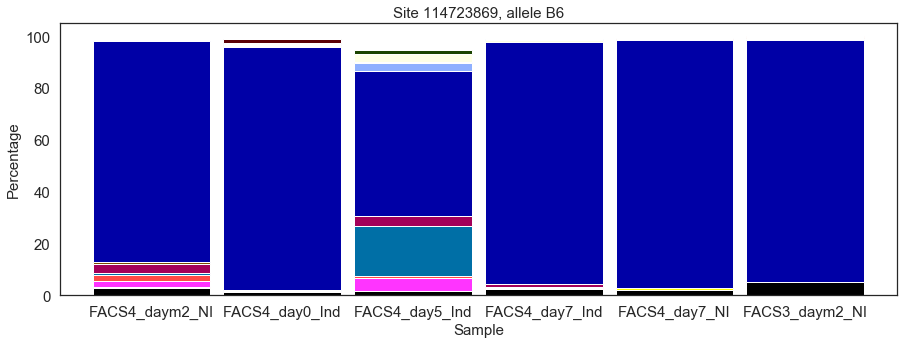

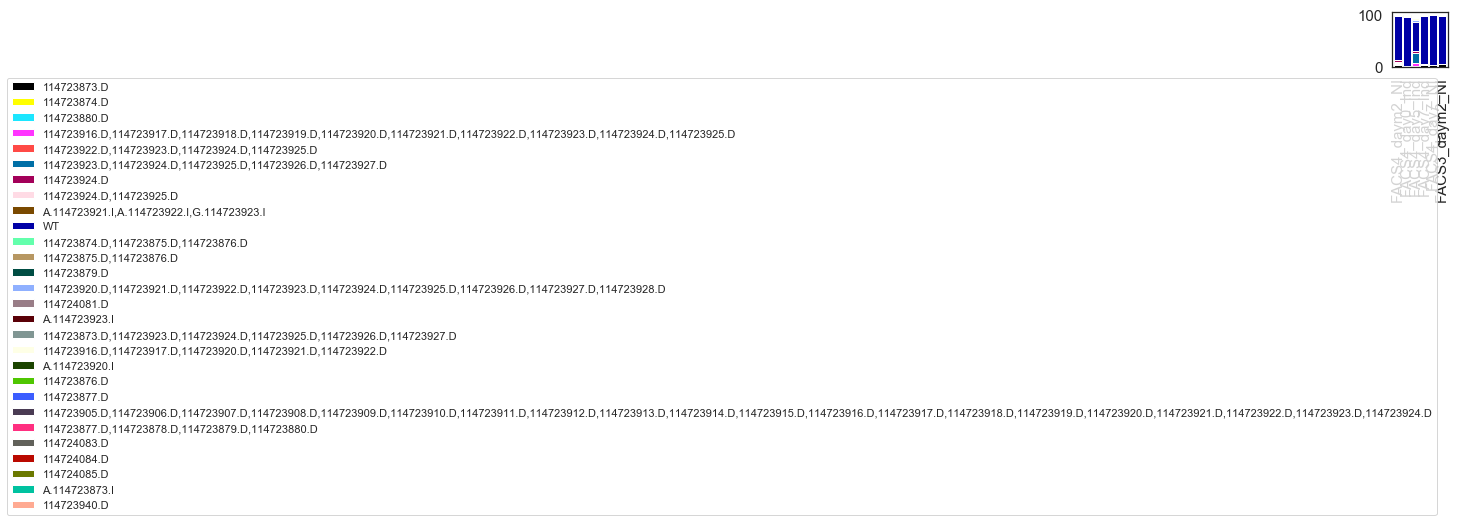

In [146]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114723869].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114723869, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114736342 - gRNA target site

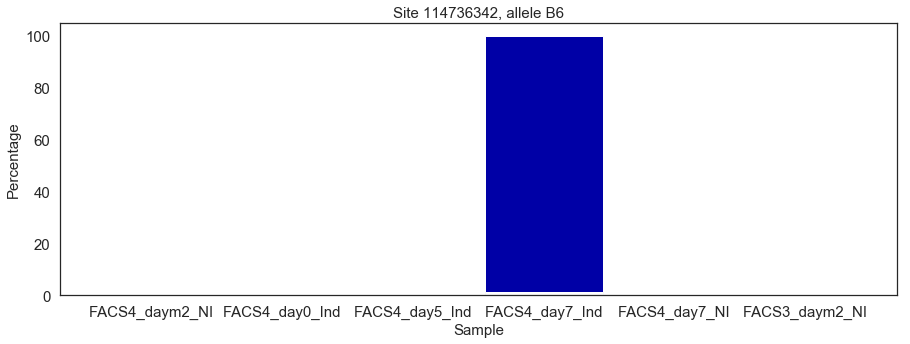

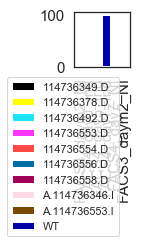

In [147]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114736342].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114736342, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114740505 - gRNA target site

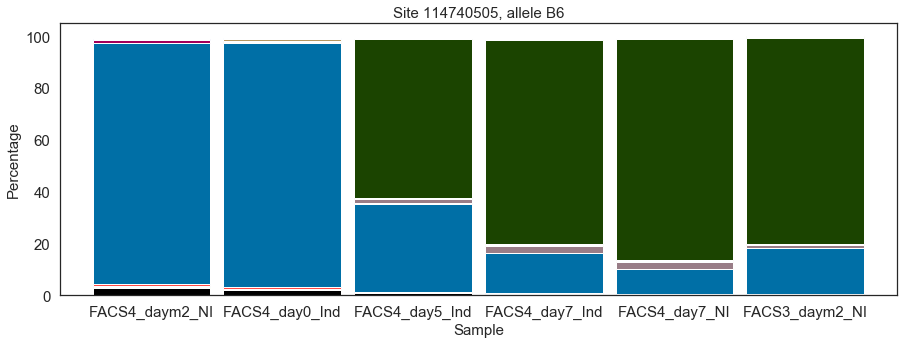

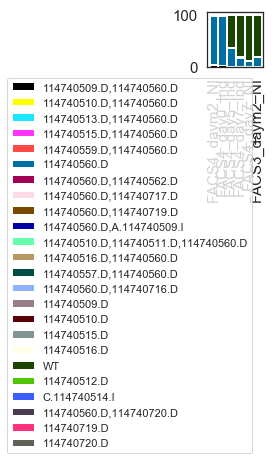

In [148]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114740505].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114740505, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114746370 - gRNA target site

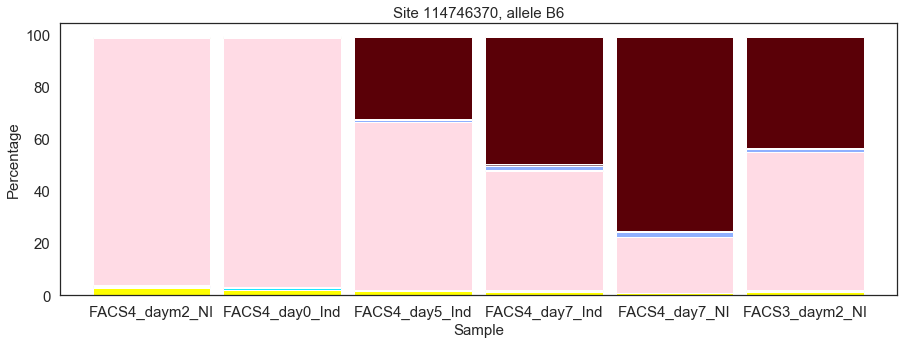

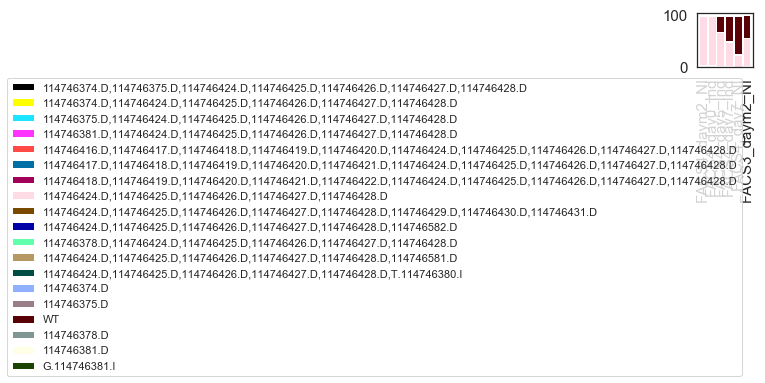

In [149]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114746370].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114781506 - no target site

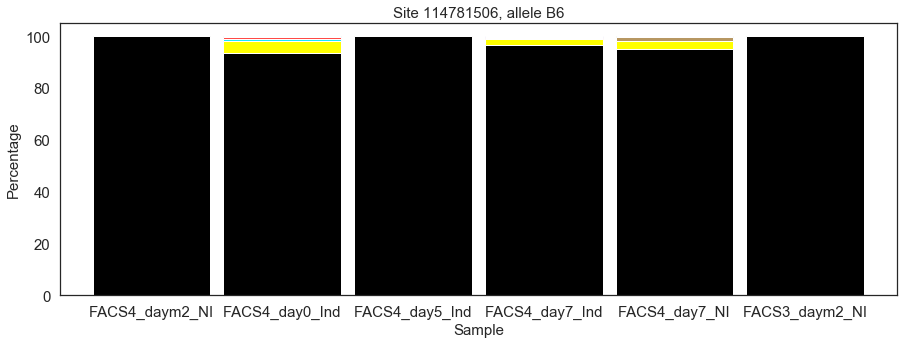

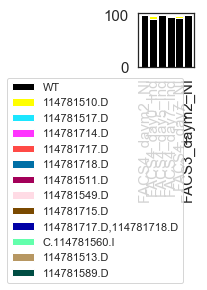

In [150]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114781506].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114781506, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114788469 - gRNA target site

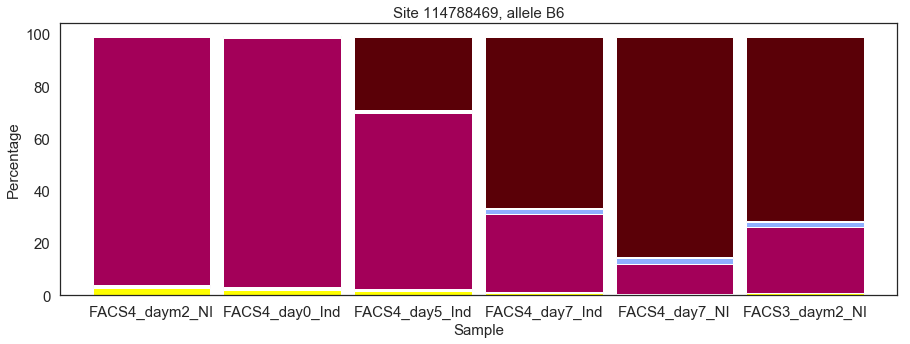

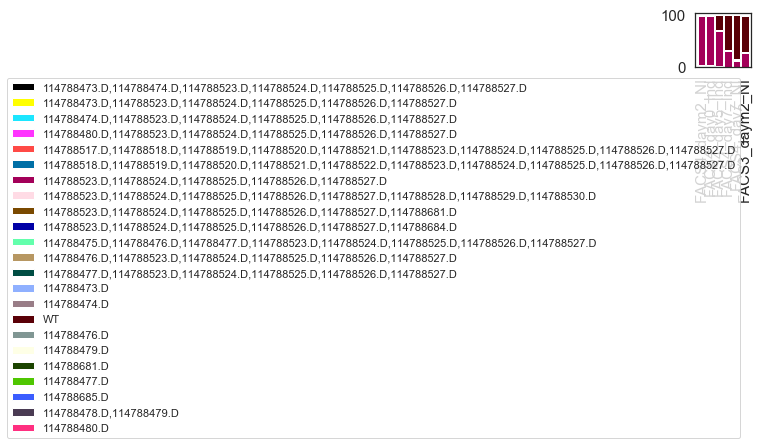

In [151]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114788469].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114788469, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114851287 - gRNA target site

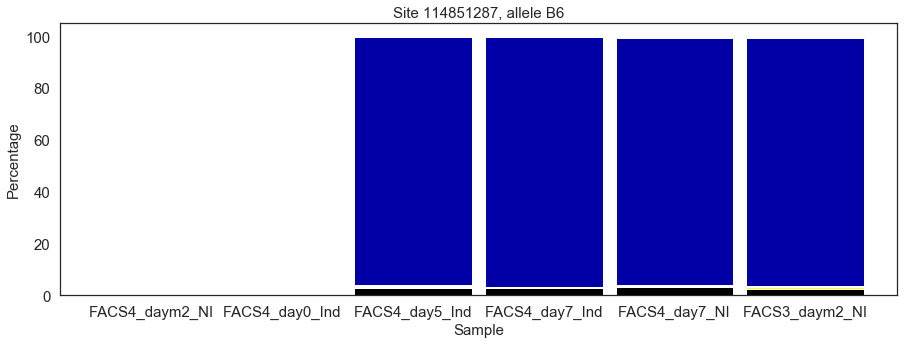

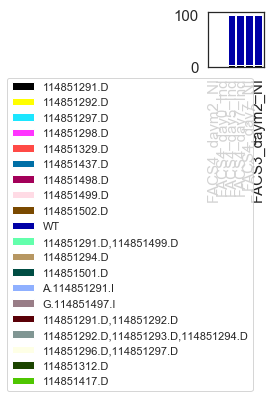

In [152]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114851287].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114851287, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114875401 - no target site

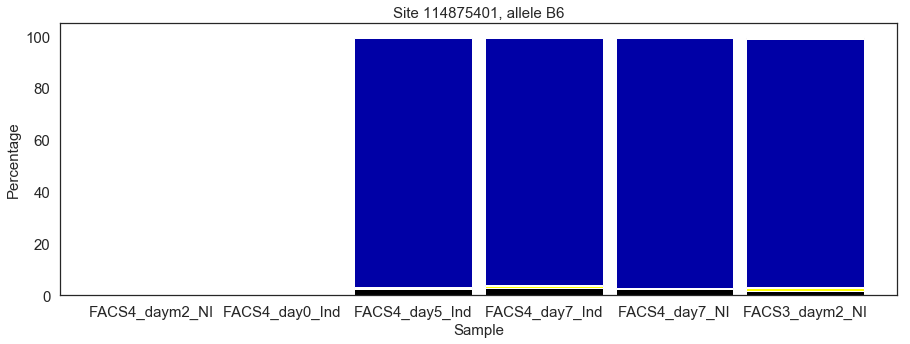

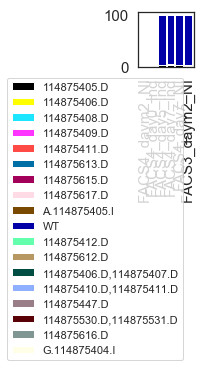

In [153]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114875401].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114875401, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114879985 - gRNA target site

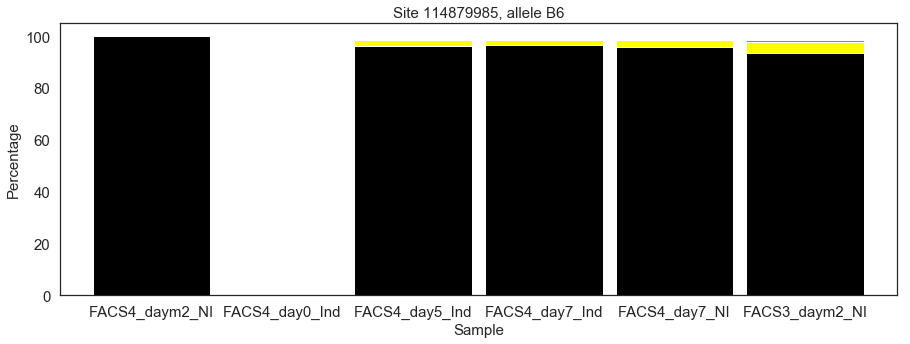

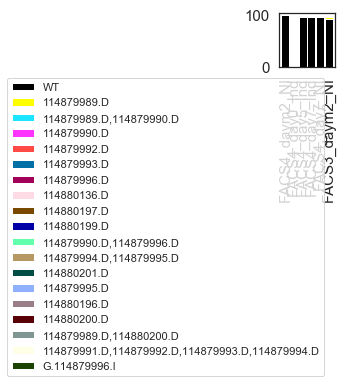

In [154]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114879985].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114879985, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114914696 - gRNA target site

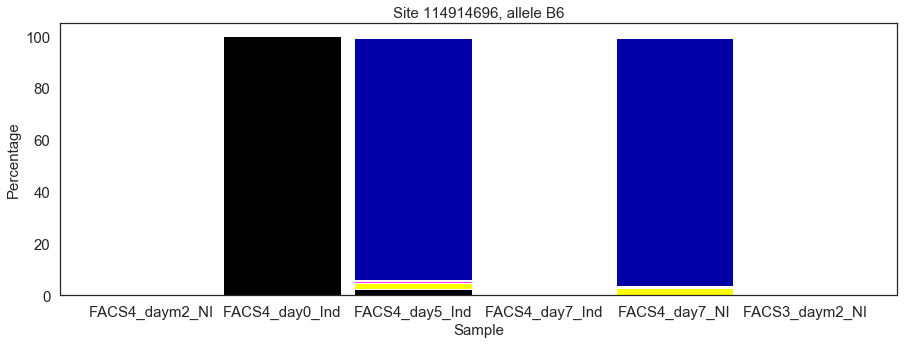

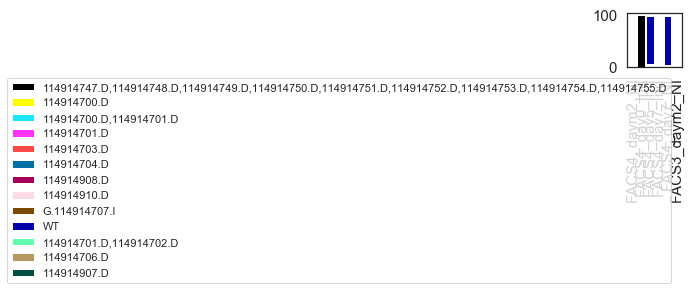

In [155]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114914696].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114914696, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114946047 - no target site

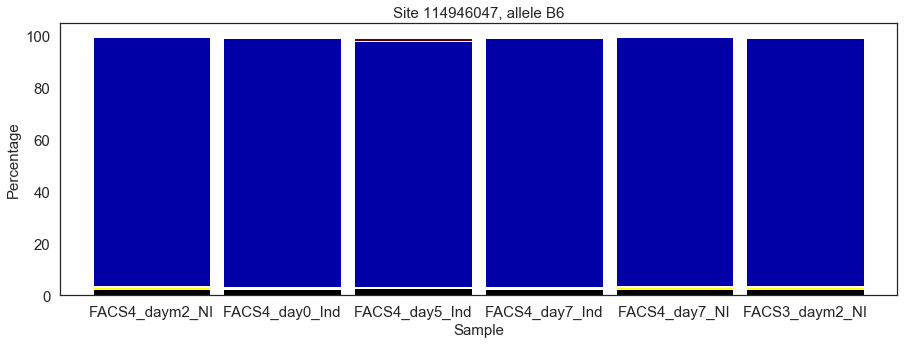

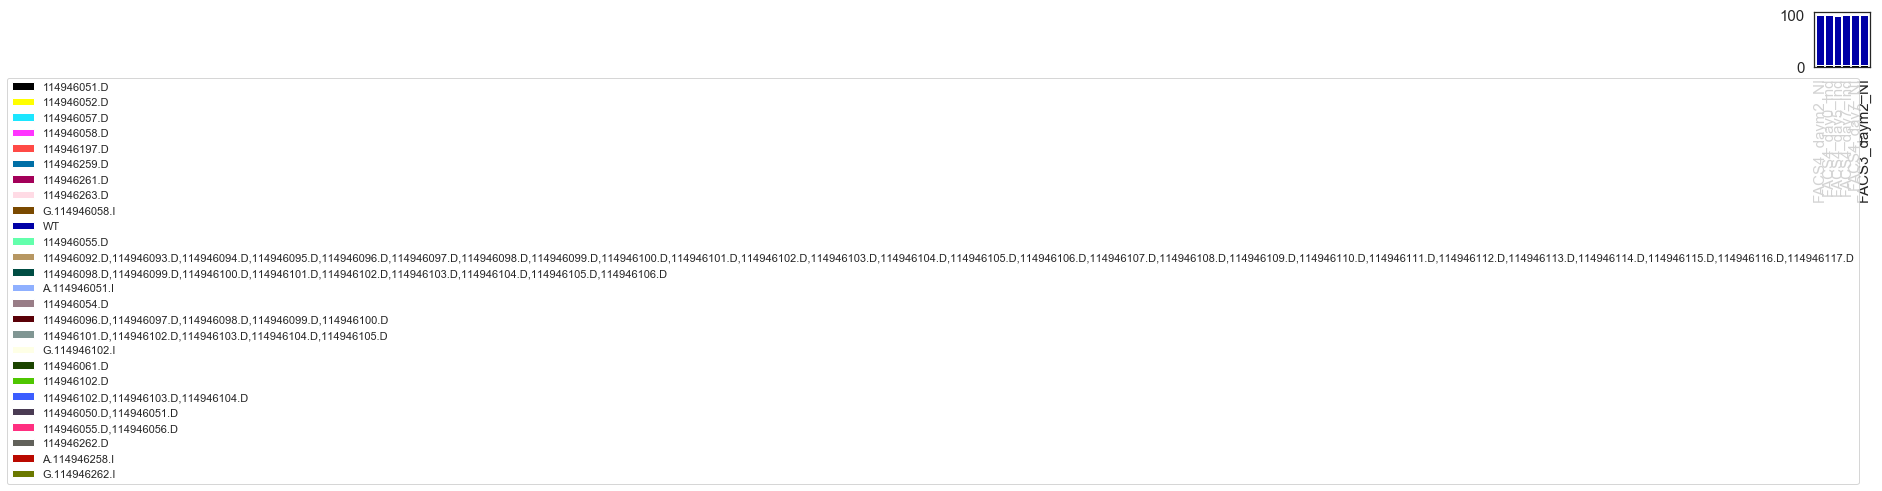

In [156]:
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114946047].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114946047, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

### Allele NA

In [131]:
percentagesChr12_NA.index.levels[0]

Int64Index([114682729, 114896335, 115604037], dtype='int64')

Site 114682729 - gRNA target site

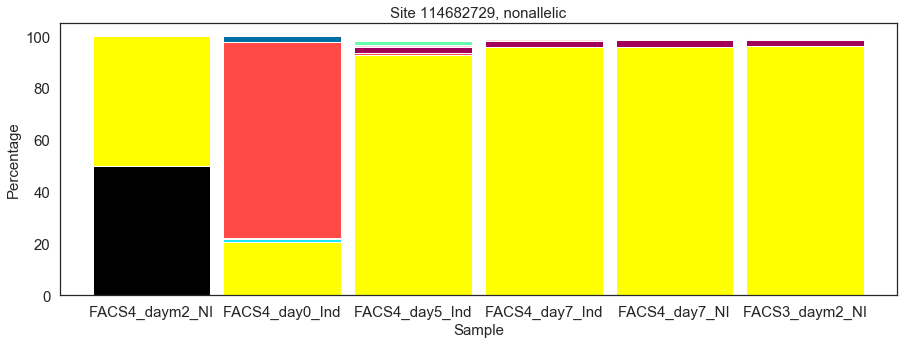

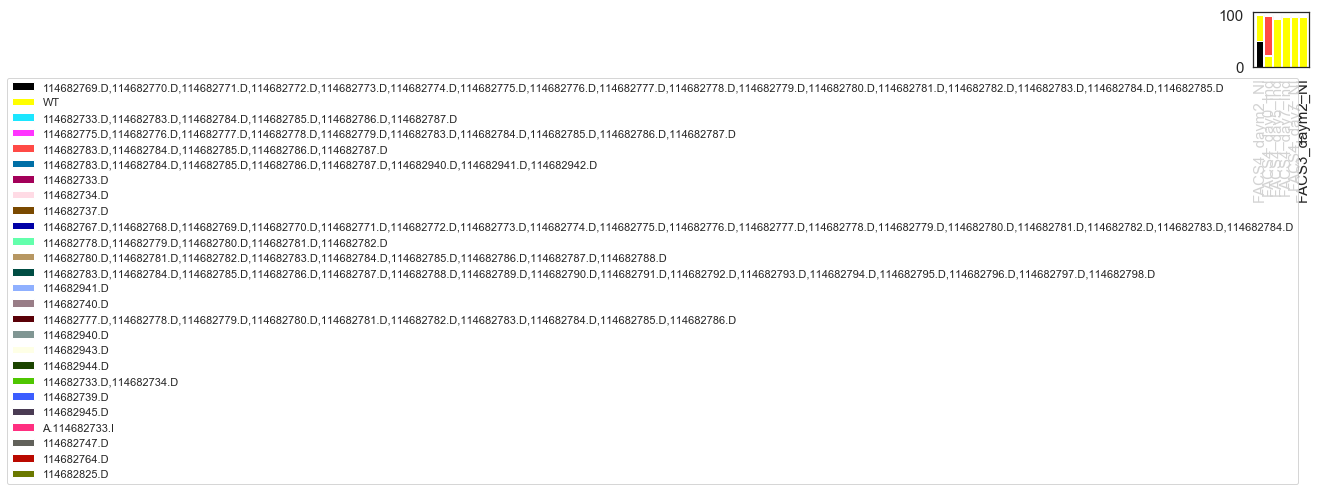

In [157]:
#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114682729].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114682729, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 114896335 - gRNA target site

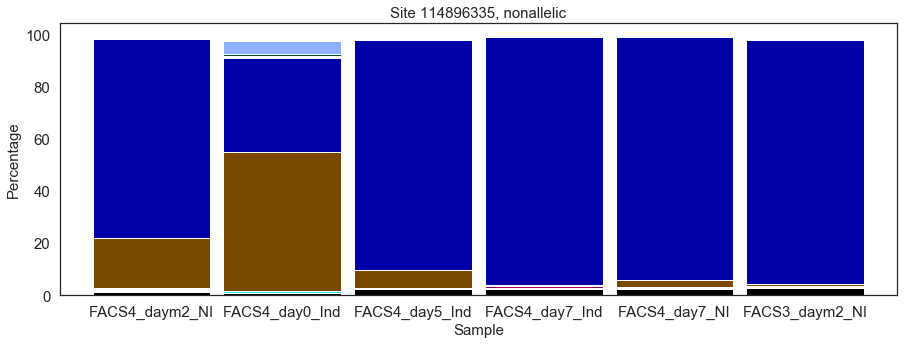

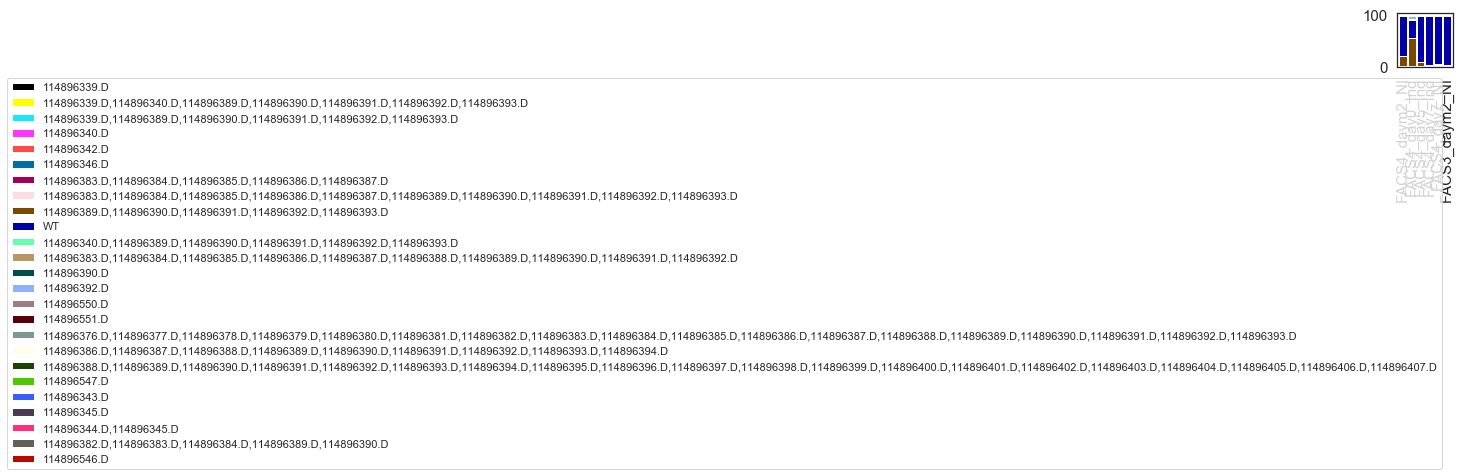

In [158]:
#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114896335].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114896335, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

Site 115604037 - no target site

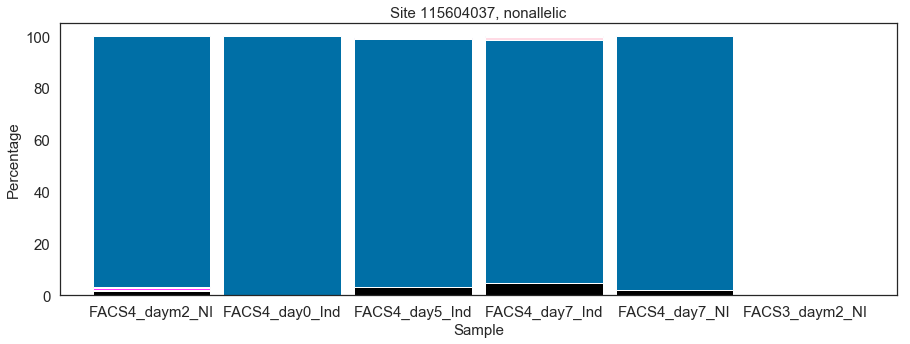

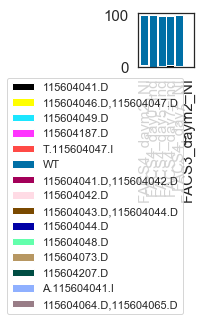

In [159]:
#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][115604037].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 115604037, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend([],frameon=False)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(1,1),fontsize = 15,width=0.90, color=cols)
ax.legend(bbox_to_anchor=(0.9,-0.1))

## Plot per site

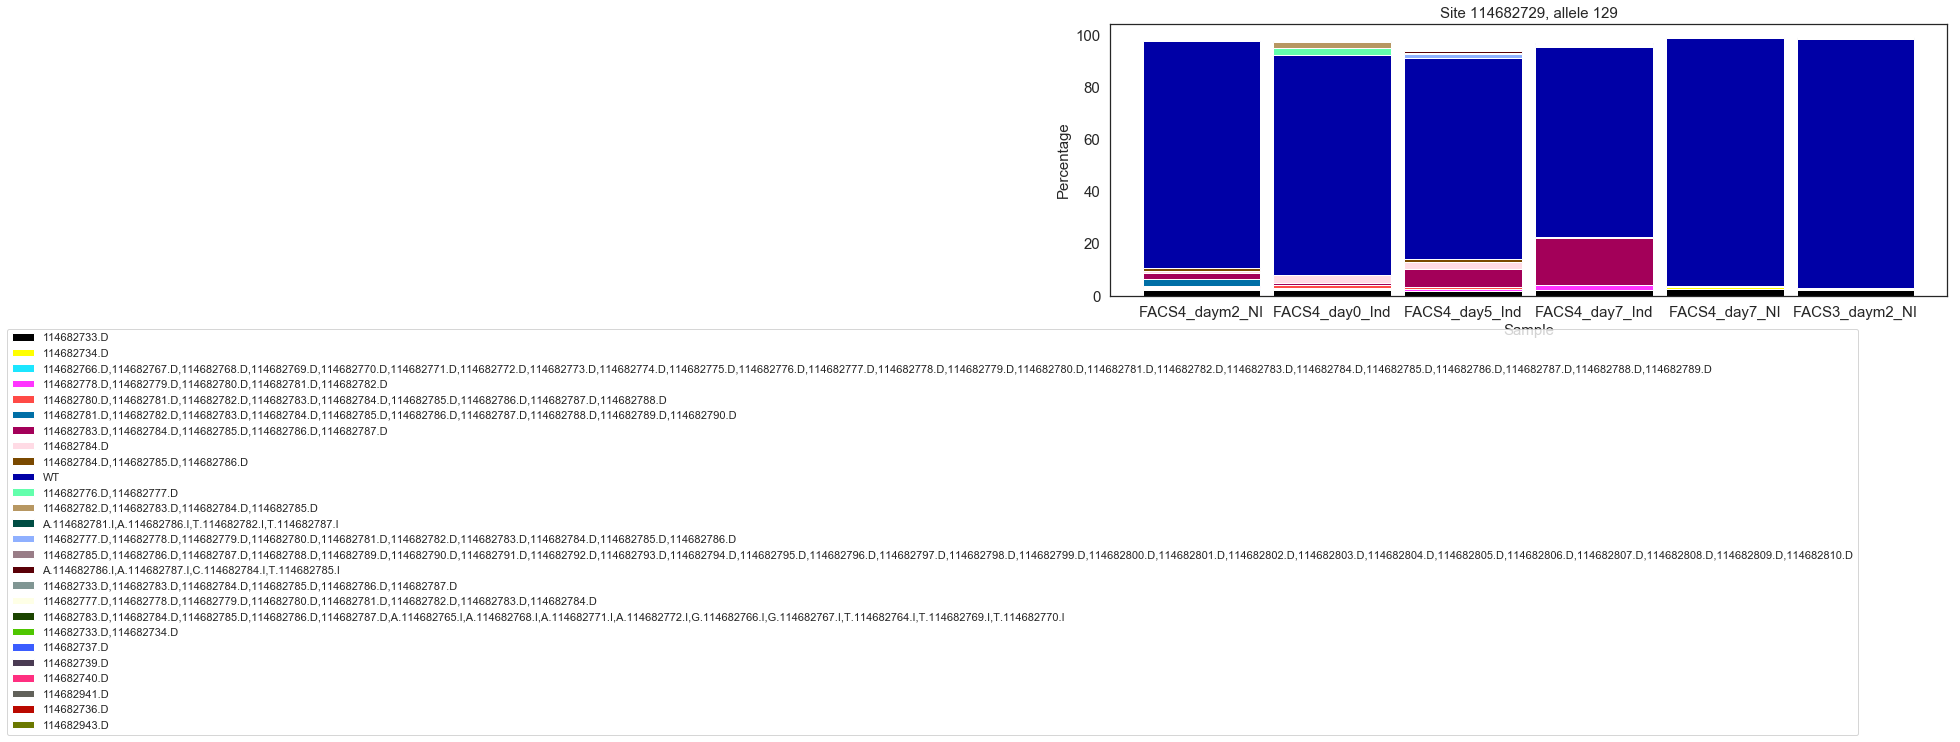

In [104]:
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114682729].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114682729, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

# Colours

In [77]:
cols=["black", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059", "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F", "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58","#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D","#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5","#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4","#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]